## 準備

In [74]:
import math
import numpy as np
import matplotlib.pyplot as plt

## スカラ

実数

In [75]:
a = 1
b = 2.5
print(a + b)

3.5


In [76]:
a + int(b)

3

複素数

In [77]:
c1 = 1 + 2j
c2 = complex(1,2)
print(c1,c2)

(1+2j) (1+2j)


In [78]:
c1.conjugate()

(1-2j)

## ベクトル
numpyやPytorchでは基本的に横ベクトルが並んでいる感じで行列・テンソルが表現される（row-major）のでご注意を。

In [79]:
# ベクトルのノルム
a = np.array([1,2,3])
b = np.array([4,5,6])

print('aのノルム',np.linalg.norm(a), ', aの方向を表す単位ベクトル',a/np.linalg.norm(a))
print('bのノルム',np.linalg.norm(b), ', bの方向を表す単位ベクトル',b/np.linalg.norm(b))

print('aのL1ノルム',np.linalg.norm(a, ord=1), ', bのL1ノルム',np.linalg.norm(b, ord=1))

aのノルム 3.7416573867739413 , aの方向を表す単位ベクトル [0.26726124 0.53452248 0.80178373]
bのノルム 8.774964387392123 , bの方向を表す単位ベクトル [0.45584231 0.56980288 0.68376346]
aのL1ノルム 6.0 , bのL1ノルム 15.0


In [80]:
# ベクトルの演算
a = np.array([1,2,3])
b = np.array([4,5,6])
k = 3
print('スカラ倍', k*a)
print('内積', a.dot(b)) # np.dot(a,b) でも、a@bでもOK
print('外積', np.cross(a,b))  # np.outerは、ここでいう外積（クロス積）とは異なるので注意

スカラ倍 [3 6 9]
内積 32
外積 [-3  6 -3]


### 内積の応用

In [81]:
# 直交するベクトルの内積
a = np.array([1,2,3])
# b = np.array([4,5,6])
c = np.array([-3,6,-3])
print('直交するベクトルの内積', a.dot(c))

# 同じ単位ベクトルの内積
e1 = e2 = a/np.linalg.norm(a) # 単位ベクトルに正規化
print('同じ単位ベクトル同士の内積', e1.dot(e2))

直交するベクトルの内積 0
同じ単位ベクトル同士の内積 1.0


### 外積の応用

法線ベクトル（正規化前） [ 1 -1  0] , 法線ベクトル（単位ベクトル） [ 0.70710678 -0.70710678  0.        ]


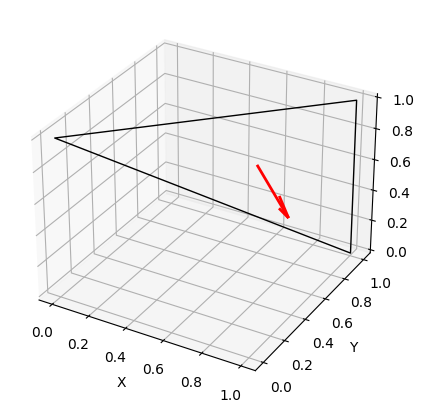

In [82]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 三角形ポリゴンの法線
x1 = np.array([0,0,1])
x2 = np.array([1,1,0])
x3 = np.array([1,1,1])

# 法線 (normal) の計算
v1 = x2 - x1
v2 = x3 - x1
normal = np.cross(v1, v2)
normal_length = np.linalg.norm(normal)
normal_unit = normal / normal_length  # 単位ベクトルに正規化

print('法線ベクトル（正規化前）', normal, ', 法線ベクトル（単位ベクトル）',normal_unit)

# 三角形の重心を計算
centroid = (x1 + x2 + x3) / 3

# 描画
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# ポリゴンを描画
vertices = [x1, x2, x3]
polygon = Poly3DCollection([vertices], edgecolors='k', linewidths=1, alpha=0)
ax.add_collection3d(polygon)

# 法線ベクトルを矢印で描画（ベクトル場の表示関数）
ax.quiver(centroid[0], centroid[1], centroid[2],
          normal_unit[0], normal_unit[1], normal_unit[2],
          length=0.5, color='r', linewidth=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 行列

行列の積と転置

In [83]:
A = np.array([[1,4],
             [2,5],
             [3,6]])

B = np.array([[1,3,5,7],
             [2,4,6,8]])

C = np.array([[7,10],
             [8,11],
             [9,12]])

print('行列積')
print(A@B)

print('アダマール積')
print(A*C)

print('行列の転置')
print(A.T)

print('行列の転置と積の関係')
print((A@B).T)
print(B.T @ A.T)

行列積
[[ 9 19 29 39]
 [12 26 40 54]
 [15 33 51 69]]
アダマール積
[[ 7 40]
 [16 55]
 [27 72]]
行列の転置
[[1 2 3]
 [4 5 6]]
行列の転置と積の関係
[[ 9 12 15]
 [19 26 33]
 [29 40 51]
 [39 54 69]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]
 [39 54 69]]


## Ax=b（Aが正方行列の場合）

In [84]:
D = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])

print('行列式（線形従属）')
print(np.linalg.det(D))

# print(np.linalg.inv(D)) # singular matrixのエラーが出る

A = np.array([[3,2,-1],
             [-1,3,2],
             [4,-1,3]])

print('行列式（正則行列）')
print(np.linalg.det(A))

print('逆行列')
print(np.linalg.inv(A))

b = np.array([[4],
             [1],
             [5]])

print('Ax=bの解')
x = np.linalg.inv(A)@b
print(x)

行列式（線形従属）
0.0
行列式（正則行列）
65.99999999999997
逆行列
[[ 0.16666667 -0.07575758  0.10606061]
 [ 0.16666667  0.1969697  -0.07575758]
 [-0.16666667  0.16666667  0.16666667]]
Ax=bの解
[[1.12121212]
 [0.48484848]
 [0.33333333]]


固有値分解

In [85]:
A = np.array([[4,2,1],
             [2,3,1],
             [1,1,2]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print('固有値')
print(eigenvalues)

print('固有ベクトル')
print(eigenvectors)

print('固有値と固有ベクトルの積')
print(A @ eigenvectors[:, 0])
print(eigenvalues[0] * eigenvectors[:, 0])

固有値
[6.04891734 1.64310413 1.30797853]
固有ベクトル
[[ 0.73697623  0.59100905  0.32798528]
 [ 0.59100905 -0.32798528 -0.73697623]
 [ 0.32798528 -0.73697623  0.59100905]]
固有値と固有ベクトルの積
[4.45790829 3.57496488 1.98395583]
[4.45790829 3.57496488 1.98395583]


## 行列のランクと過決定系の解法

In [86]:
D = np.array([[1,2,3],
             [2,4,6],
             [3,5,7],
             [6,10,14]])

print('行列のランク（フルランクでない例）')
print(np.linalg.matrix_rank(D))

A = np.array([[1,1,],
             [1,-1],
             [0,1]])

print('行列のランク（フルランク例）')
print(np.linalg.matrix_rank(A))

print('擬似逆行列')
print(np.linalg.pinv(A))

b = np.array([[4],
             [0],
             [1]])

print('Ax=bの最小二乗解')
x = np.linalg.pinv(A)@b
print(x)


行列のランク（フルランクでない例）
2
行列のランク（フルランク例）
2
擬似逆行列
[[ 0.5         0.5         0.        ]
 [ 0.33333333 -0.33333333  0.33333333]]
Ax=bの最小二乗解
[[2.        ]
 [1.66666667]]


## 同次系Ax=0

In [87]:
A = np.array([[1,2,3],
             [2,4,6],
             [1,-1,0],
             [3,1,4]])

print('行列のランク')
print(np.linalg.matrix_rank(A))

U, s, V = np.linalg.svd(A, full_matrices=False)
print('U')
print(U)
print('Sigma')
print(s)
print('V')
print(V)

# 最後の特異値が極めて小さい（ほぼ0）ことがわかる
x = V.T[:,-1]
print('x')
print(x)

print('Ax')
print(A@x)

行列のランク
2
U
[[-0.38746985 -0.18072857 -0.32439425]
 [-0.7749397  -0.36145713  0.44795768]
 [ 0.01044029  0.57258012  0.71440138]
 [-0.49922598  0.71332877 -0.42864083]]
Sigma
[9.58802252e+00 2.46370131e+00 1.69214308e-16]
V
[[-0.35717343 -0.45727518 -0.81444861]
 [ 0.73423008 -0.6764363   0.05779377]
 [ 0.57735027  0.57735027 -0.57735027]]
x
[ 0.57735027  0.57735027 -0.57735027]
Ax
[0. 0. 0. 0.]


SVDと固有値分解

In [88]:
A = np.array([[1,2,3],
             [2,4,6],
             [1,-1,0],
             [3,1,4]])

U, s, V = np.linalg.svd(A, full_matrices=False)
print('U')
print(U)
print('Sigma')
print(s)
print('V')

print('A.T@Aの固有値分解')
eigenvalues, eigenvectors = np.linalg.eig(A.T@A)

print('eigenvalues')
print(eigenvalues)

print('Sigma^2')
print(s*s)  # 最後の固有値は数値誤差程度の差（両方ほぼ0）

print('eigenvectors')
print(eigenvectors)

U
[[-0.38746985 -0.18072857 -0.32439425]
 [-0.7749397  -0.36145713  0.44795768]
 [ 0.01044029  0.57258012  0.71440138]
 [-0.49922598  0.71332877 -0.42864083]]
Sigma
[9.58802252e+00 2.46370131e+00 1.69214308e-16]
V
A.T@Aの固有値分解
eigenvalues
[ 9.19301759e+01  6.06982413e+00 -1.87294694e-16]
Sigma^2
[9.19301759e+01 6.06982413e+00 2.86334822e-32]
eigenvectors
[[-0.35717343 -0.73423008 -0.57735027]
 [-0.45727518  0.6764363  -0.57735027]
 [-0.81444861 -0.05779377  0.57735027]]
